In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data , columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target

In [7]:
df['flower_names'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [9]:
df0 = df[df.target==0]
df1 = df[df.target==2]
df2 = df[df.target==2]

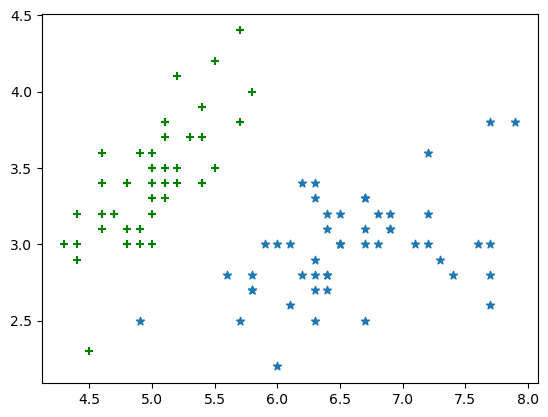

In [10]:
%matplotlib inline
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='+',color='g')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='*')


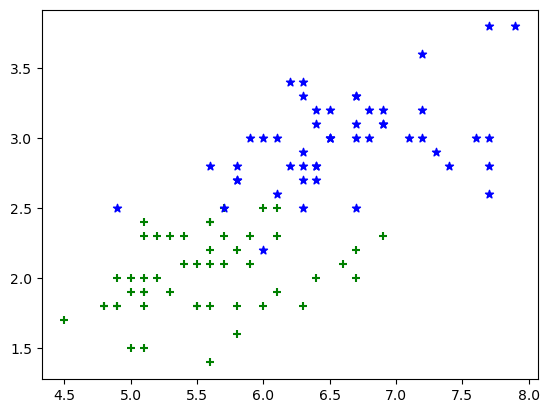

In [11]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='+',color='g')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],marker='*',color='b')

In [12]:
X = df.drop(['target','flower_names'],axis=1)
y=df.target

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2)

In [14]:
from sklearn.svm import SVC
model = SVC(gamma='scale',C=1000) #regularization(C) is depedend on graph first see graph and then decide regularization
#C = regularization  , svm=support vector machine  , SVC=support vector classifier

In [15]:
model.fit(X_train,y_train)

SVC(C=1000)

In [28]:
l1= [y_test]
l1

[45     0
 96     1
 88     1
 60     1
 74     1
 98     1
 42     0
 110    2
 33     0
 143    2
 111    2
 73     1
 94     1
 141    2
 142    2
 105    2
 87     1
 75     1
 71     1
 119    2
 34     0
 91     1
 101    2
 115    2
 135    2
 53     1
 79     1
 104    2
 50     1
 23     0
 Name: target, dtype: int32]

In [30]:
l2 = [X_t,model.predict(X_test)]
l2

[     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 45                 4.8               3.0                1.4               0.3
 96                 5.7               2.9                4.2               1.3
 88                 5.6               3.0                4.1               1.3
 60                 5.0               2.0                3.5               1.0
 74                 6.4               2.9                4.3               1.3
 98                 5.1               2.5                3.0               1.1
 42                 4.4               3.2                1.3               0.2
 110                6.5               3.2                5.1               2.0
 33                 5.5               4.2                1.4               0.2
 143                6.8               3.2                5.9               2.3
 111                6.4               2.7                5.3               1.9
 73                 6.1               2.8           

In [18]:
model.score(X_train,y_train)

0.975